In [1]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization


In [2]:
# image dimension
img_width, img_height = 64, 64

# training and validation set directory
train_data_dir = 'DataSet/Training'
validation_data_dir = 'DataSet/Validation'

num_train_samples = 4222
num_validation_samples = 521

epochs = 20
batch_size = 32 

input_shape = (img_width, img_height, 3)


In [3]:
# this is the augmentation configuration use for training
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255, #to normalize the data
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [4]:
# this is the augmentation configuration use for testing:only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    #color_mode = 'grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    #color_mode = 'grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 4222 images belonging to 8 classes.
Found 521 images belonging to 8 classes.


In [5]:
#Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# to print the summary of the layers
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [31]:
#define the checkpoint
filepath="Model"
checkpointer = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

import keras
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_validation_samples // batch_size,
    callbacks = [checkpointer]
)


Epoch 1/20
131/131 [==============================] - ETA: 0s - loss: 0.0659 - accuracy: 0.9757
Epoch 00001: accuracy improved from -inf to 0.97566, saving model to Model
INFO:tensorflow:Assets written to: Model\assets
131/131 [==============================] - 49s 373ms/step - loss: 0.0659 - accuracy: 0.9757 - val_loss: 0.4219 - val_accuracy: 0.9082
Epoch 2/20
131/131 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9800
Epoch 00002: accuracy improved from 0.97566 to 0.97995, saving model to Model
INFO:tensorflow:Assets written to: Model\assets
131/131 [==============================] - 49s 373ms/step - loss: 0.0603 - accuracy: 0.9800 - val_loss: 0.2617 - val_accuracy: 0.9414
Epoch 3/20
131/131 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9737
Epoch 00003: accuracy did not improve from 0.97995
131/131 [==============================] - 45s 345ms/step - loss: 0.0741 - accuracy: 0.9737 - val_loss: 0.3774 - val_accuracy: 0.9316
Epoch 4/20

In [32]:
from keras.models import load_model

new_model = load_model("Model")
EPOCHS=100
checkpoint = ModelCheckpoint(filepath, monitor = 'accuracy', verbose = 1, save_best_only = True, mode = 'max') 
history = new_model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=num_validation_samples // batch_size,
    callbacks = [checkpointer]
)

Epoch 1/100
131/131 [==============================] - ETA: 0s - loss: 0.0664 - accuracy: 0.9761
Epoch 00001: accuracy did not improve from 0.98282
131/131 [==============================] - 49s 357ms/step - loss: 0.0664 - accuracy: 0.9761 - val_loss: 0.2864 - val_accuracy: 0.9316
Epoch 2/100
131/131 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9742
Epoch 00002: accuracy did not improve from 0.98282
131/131 [==============================] - 37s 279ms/step - loss: 0.0800 - accuracy: 0.9742 - val_loss: 0.3573 - val_accuracy: 0.9180
Epoch 3/100
131/131 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9788
Epoch 00003: accuracy did not improve from 0.98282
131/131 [==============================] - 31s 234ms/step - loss: 0.0603 - accuracy: 0.9788 - val_loss: 0.5422 - val_accuracy: 0.9062
Epoch 4/100
131/131 [==============================] - ETA: 0s - loss: 0.0682 - accuracy: 0.9780
Epoch 00004: accuracy did not improve from 0.98282
131/13

Epoch 30/100
131/131 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.9828
Epoch 00030: accuracy did not improve from 0.98329
131/131 [==============================] - 31s 240ms/step - loss: 0.0516 - accuracy: 0.9828 - val_loss: 0.2672 - val_accuracy: 0.9316
Epoch 31/100
131/131 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9754
Epoch 00031: accuracy did not improve from 0.98329
131/131 [==============================] - 32s 243ms/step - loss: 0.0720 - accuracy: 0.9754 - val_loss: 0.3987 - val_accuracy: 0.9219
Epoch 32/100
131/131 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9821
Epoch 00032: accuracy did not improve from 0.98329
131/131 [==============================] - 32s 242ms/step - loss: 0.0522 - accuracy: 0.9821 - val_loss: 0.3210 - val_accuracy: 0.9316
Epoch 33/100
131/131 [==============================] - ETA: 0s - loss: 0.0739 - accuracy: 0.9776 ETA: 2s - loss: 0.074
Epoch 00033: accuracy did not i

131/131 [==============================] - ETA: 0s - loss: 0.0670 - accuracy: 0.9780
Epoch 00058: accuracy did not improve from 0.98496
131/131 [==============================] - 33s 251ms/step - loss: 0.0670 - accuracy: 0.9780 - val_loss: 0.4608 - val_accuracy: 0.9160
Epoch 59/100
131/131 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.9816
Epoch 00059: accuracy did not improve from 0.98496
131/131 [==============================] - 35s 263ms/step - loss: 0.0494 - accuracy: 0.9816 - val_loss: 0.2791 - val_accuracy: 0.9434
Epoch 60/100
131/131 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9821
Epoch 00060: accuracy did not improve from 0.98496
131/131 [==============================] - 33s 252ms/step - loss: 0.0504 - accuracy: 0.9821 - val_loss: 0.5958 - val_accuracy: 0.9043
Epoch 61/100
131/131 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9761
Epoch 00061: accuracy did not improve from 0.98496
131/131 [======

Epoch 87/100
131/131 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9814
Epoch 00087: accuracy did not improve from 0.98544
131/131 [==============================] - 46s 350ms/step - loss: 0.0567 - accuracy: 0.9814 - val_loss: 0.4172 - val_accuracy: 0.9277
Epoch 88/100
131/131 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9852
Epoch 00088: accuracy did not improve from 0.98544
131/131 [==============================] - 45s 347ms/step - loss: 0.0449 - accuracy: 0.9852 - val_loss: 0.2945 - val_accuracy: 0.9414
Epoch 89/100
131/131 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9814
Epoch 00089: accuracy did not improve from 0.98544
131/131 [==============================] - 44s 336ms/step - loss: 0.0554 - accuracy: 0.9814 - val_loss: 0.2588 - val_accuracy: 0.9512
Epoch 90/100
131/131 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9840
Epoch 00090: accuracy did not improve from 0.98544
13

In [33]:
model.save('Model')

INFO:tensorflow:Assets written to: Model\assets


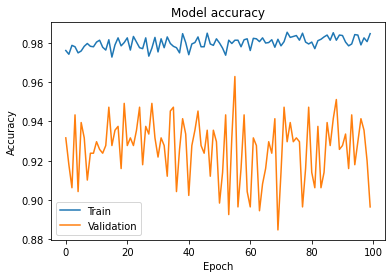

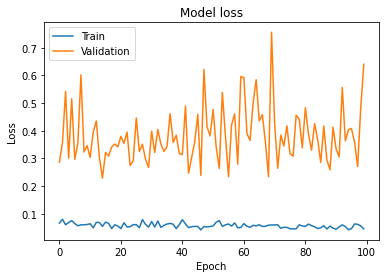

In [35]:
#TRAINING HISTORY VISUALIZATION
import matplotlib.pyplot as plt


#TRAINING HISTORY VISUALIZATION

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
model.save('Model')

INFO:tensorflow:Assets written to: Model\assets
